# Build Your Own AI Chatbot with OpenAI & LangChain

© 2024 ZAKA AI, Inc. All Rights Reserved.

# Basic interaction with Open AI

Install OpenAI

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


Set your API key in a variable

In [ ]:
openai_key= "<your openAI API key here>"

Create a client variable that will be used to create API calls

In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key=openai_key,
)

Add a list of messages

In [ ]:
messages = [
    # Create the role of the System
    {"role": "system", "content": "You are an intelligent assistant, you are extremely good at making jokes."},
    # Add a new message as a user, this simulates a message you send on ChatGPT for example
    {"role": "user", "content": "Tell me a smart joke, make it rhyme"}
]

Call openAI and start the chat

In [ ]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature=0.4
)

Get the reply from OpenAI

In [ ]:
reply = response.choices[0].message
print(reply)

ChatCompletionMessage(content='In a world where numbers dance and play,  \nA mathematician said, "Let’s find pi today!"  \nBut when asked for a slice, he just couldn’t comply,  \nHe said, "I can’t, it’s irrational, I’m on a diet, okay?"', refusal=None, role='assistant', function_call=None, tool_calls=None)


Let's look at the whole structure of a chat

In [ ]:
response

ChatCompletion(id='chatcmpl-9w18rS243VHdvX6Q1NUZUL2OJ6bce', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='In a world where numbers dance and play,  \nA mathematician said, "Let’s find pi today!"  \nBut when asked for a slice, he just couldn’t comply,  \nHe said, "I can’t, it’s irrational, I’m on a diet, okay?"', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1723614441, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_48196bc67a', usage=CompletionUsage(completion_tokens=57, prompt_tokens=34, total_tokens=91))

The response object has a few fields:

- **id:** The unique identifier for the request.
- **object:** Indicates the type of object returned by the API.
- **created:** The UNIX timestamp when the request was made.
- **model:** Specifies the full name of the model used to generate the response.
- **usage:** Details the number of tokens used, including tokens for the prompt, completion, and the total.
- **choices:** A list containing the completion objects.
- **finish_reason:** The reason the model stopped generating text (due to encountering a stop sequence).
- **index:** The index of the completion in the list of choices.

# Intro to LangChain

Install Langchain

In [ ]:
!pip install langchain langchain-openai langchain-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


## Getting Started with langChain

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

Add a summary template

In [ ]:
summary_template = """
given the {information} about a person I want you to create the following

1. a one-liner short summary
2. {number} interesting facts about them
"""

Create a prompt template

In [ ]:
summary_prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", summary_template),
    ]
)

Create the OpenAI LLM instance with OpenAI Chat

In [ ]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.4,
    api_key=openai_key  # Optionally, you can set this as an environment variable
)

Put things together, **chain** the prompt template with the LLM

In [ ]:
chain = LLMChain(llm=llm, prompt=summary_prompt_template)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Run the chain and supply information
First, get information

In [ ]:
information_elon = """
Elon Reeve Musk ( born June 28, 1971) is a business magnate and investor. He is the founder, CEO and chief engineer of SpaceX; angel investor, CEO and product architect of Tesla, Inc.; owner and CEO of Twitter, Inc.; founder of the Boring Company; co-founder of Neuralink and OpenAI; and president of the philanthropic Musk Foundation. Musk is the second-wealthiest person in the world, according to both the Bloomberg Billionaires Index and Forbes's Real Time Billionaires list as of May 2023 primarily from his ownership stakes in Tesla and SpaceX, with an estimated net worth of around $167 billion according to the Bloomberg and $176.2 billion according to Forbes.[4][5][6][7]

Musk was born in Pretoria, South Africa, and briefly attended the University of Pretoria before moving to Canada at age 18, acquiring citizenship through his Canadian-born mother. Two years later, he matriculated at Queen's University and transferred to the University of Pennsylvania, where he received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University. After two days, he dropped out and, with his brother Kimbal, co-founded the online city guide software company Zip2. In 1999, Zip2 was acquired by Compaq for $307 million and Musk co-founded X.com, a direct bank. X.com merged with Confinity in 2000 to form PayPal, which eBay acquired for $1.5 billion in 2002.

With $175.8 million, Musk founded SpaceX in 2002, a spaceflight services company. In 2004, he was an early investor in the electric vehicle manufacturer Tesla Motors, Inc. (now Tesla, Inc.). He became its chairman and product architect, assuming the position of CEO in 2008. In 2006, he helped create SolarCity, a solar energy company that was later acquired by Tesla and became Tesla Energy. In 2015, he co-founded OpenAI, a nonprofit artificial intelligence research company. The following year, he co-founded Neuralink—a neurotechnology company developing brain–computer interfaces—and the Boring Company, a tunnel construction company. Musk has also proposed a hyperloop high-speed vactrain transportation system. In 2022, his acquisition of Twitter for $44 billion was completed.

Musk has expressed views that have made him a polarizing figure. He has been criticized for making unscientific and misleading statements, including that of spreading COVID-19 misinformation. In 2018, the U.S. Securities and Exchange Commission (SEC) sued Musk for falsely tweeting that he had secured funding for a private takeover of Tesla. Musk stepped down as chairman of Tesla and paid a $20 million fine as part of a settlement agreement with the SEC.
"""

Now, run the chain

In [ ]:
number_elon = "three"
response = chain.invoke({"information": information_elon, "number": number_elon})

In [ ]:
print(response)

{'information': "\nElon Reeve Musk ( born June 28, 1971) is a business magnate and investor. He is the founder, CEO and chief engineer of SpaceX; angel investor, CEO and product architect of Tesla, Inc.; owner and CEO of Twitter, Inc.; founder of the Boring Company; co-founder of Neuralink and OpenAI; and president of the philanthropic Musk Foundation. Musk is the second-wealthiest person in the world, according to both the Bloomberg Billionaires Index and Forbes's Real Time Billionaires list as of May 2023 primarily from his ownership stakes in Tesla and SpaceX, with an estimated net worth of around $167 billion according to the Bloomberg and $176.2 billion according to Forbes.[4][5][6][7]\n\nMusk was born in Pretoria, South Africa, and briefly attended the University of Pretoria before moving to Canada at age 18, acquiring citizenship through his Canadian-born mother. Two years later, he matriculated at Queen's University and transferred to the University of Pennsylvania, where he re

Run the chain with different information

In [ ]:
information_steve = """
Steven Paul Jobs (February 24, 1955 – October 5, 2011) was an American business magnate, inventor, and investor. He was the co-founder, chairman, and CEO of Apple; the chairman and majority shareholder of Pixar; a member of The Walt Disney Company's board of directors following its acquisition of Pixar; and the founder, chairman, and CEO of NeXT. He was a pioneer of the personal computer revolution of the 1970s and 1980s, along with his early business partner and fellow Apple co-founder Steve Wozniak.

Jobs was born in San Francisco to a Syrian father and German-American mother. He was adopted shortly after his birth. Jobs attended Reed College in 1972 before withdrawing that same year. In 1974, he traveled through India seeking enlightenment before later studying Zen Buddhism. He and Wozniak co-founded Apple in 1976 to sell Wozniak's Apple I personal computer. Together the duo gained fame and wealth a year later with production and sale of the Apple II, one of the first highly successful mass-produced microcomputers. Jobs saw the commercial potential of the Xerox Alto in 1979, which was mouse-driven and had a graphical user interface (GUI). This led to the development of the unsuccessful Apple Lisa in 1983, followed by the breakthrough Macintosh in 1984, the first mass-produced computer with a GUI. The Macintosh introduced the desktop publishing industry in 1985 with the addition of the Apple LaserWriter, the first laser printer to feature vector graphics.

In 1985, Jobs was forced out of Apple after a long power struggle with the company's board and its then-CEO, John Sculley. That same year, Jobs took a few Apple employees with him to found NeXT, a computer platform development company that specialized in computers for higher-education and business markets. In addition, he helped to develop the visual effects industry when he funded the computer graphics division of George Lucas's Lucasfilm in 1986. The new company was Pixar, which produced the first 3D computer-animated feature film Toy Story (1995) and went on to become a major animation studio, producing over 25 films since.

In 1997, Jobs returned to Apple as CEO after the company's acquisition of NeXT. He was largely responsible for reviving Apple, which was on the verge of bankruptcy. He worked closely with British designer Jony Ive to develop a line of products that had larger cultural ramifications, beginning with the "Think different" advertising campaign and leading to the Apple Store, App Store (iOS), iMac, iPad, iPod, iPhone, iTunes, and iTunes Store. In 2001, the original Mac OS was replaced with the completely new Mac OS X (later known as macOS), based on NeXT's NeXTSTEP platform, giving the operating system a modern Unix-based foundation for the first time. In 2003, Jobs was diagnosed with a pancreatic neuroendocrine tumor. He died of respiratory arrest related to the tumor in 2011, at the age of 56, with Tim Cook succeeding him as CEO of Apple. In 2022, he was posthumously awarded the Presidential Medal of Freedom.
"""

In [ ]:
number_steve = "two"
response = chain.invoke({"information": information_steve, "number": number_steve})

In [ ]:
print(response)

{'information': '\nSteven Paul Jobs (February 24, 1955 – October 5, 2011) was an American business magnate, inventor, and investor. He was the co-founder, chairman, and CEO of Apple; the chairman and majority shareholder of Pixar; a member of The Walt Disney Company\'s board of directors following its acquisition of Pixar; and the founder, chairman, and CEO of NeXT. He was a pioneer of the personal computer revolution of the 1970s and 1980s, along with his early business partner and fellow Apple co-founder Steve Wozniak.\n\nJobs was born in San Francisco to a Syrian father and German-American mother. He was adopted shortly after his birth. Jobs attended Reed College in 1972 before withdrawing that same year. In 1974, he traveled through India seeking enlightenment before later studying Zen Buddhism. He and Wozniak co-founded Apple in 1976 to sell Wozniak\'s Apple I personal computer. Together the duo gained fame and wealth a year later with production and sale of the Apple II, one of t

# Langchain chatbot with your documents

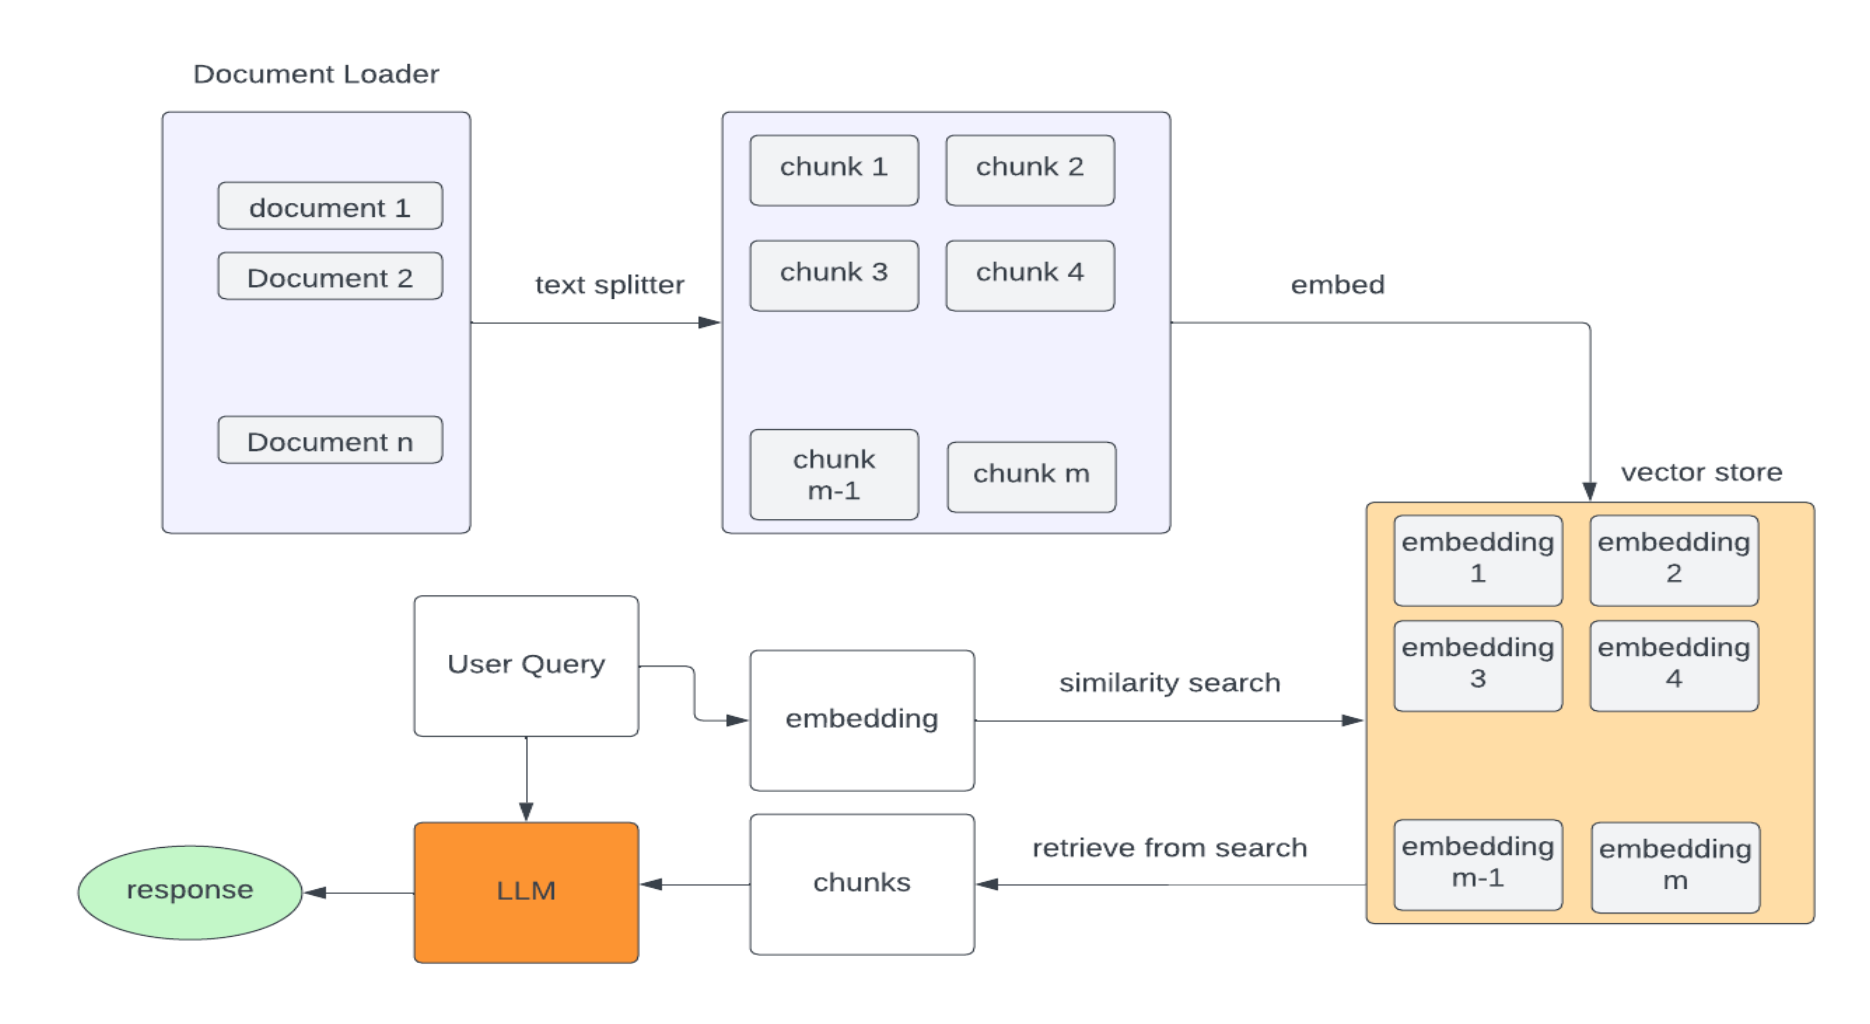

Use the document loader to load documents

In [ ]:
!pip install langchain langchain-openai langchain-community pypdf chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders import TextLoader

loader = TextLoader("AI_Bootcamp.txt")
bootcamp_text = loader.load()
print(bootcamp_text)

[Document(metadata={'source': 'AI_Bootcamp.txt'}, page_content="\ufeffZaka is a community driven AI education, consultancy, and team augmentation startup that aims to provide the proper Artificial Intelligence (AI) awareness to the community in the region to prepare them for the new technological era and build a vibrant MENA AI ecosystem. Zaka is on a journey to democratize Artificial Intelligence (AI) in the MENA region and globally through sharing knowledge, building solutions and connecting people!\n\n\nWHAT IS ZAKA AI BOOTCAMP?\nData science is one of the most growing fields in the industry today, with Artificial Intelligence (AI) being one of the most attractive skills a professional can possess.\nTo assist in introducing participants to the vast field of AI, we present Zaka AI Bootcamp, that would provide participants with the necessary basic knowledge and hands-on skills needed to get started in AI. Each day of the bootcamp will build on introducing participants to a new branch 

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
pdf_loader = PyPDFLoader("AI_Certification.pdf")
data_pdf = pdf_loader.load()
print(data_pdf)

[Document(metadata={'source': 'AI_Certification.pdf', 'page': 0}, page_content='Artiﬁcial Intelligence \nCertiﬁcation \nDetailed Curriculum \nV3 - May 2023 \n'), Document(metadata={'source': 'AI_Certification.pdf', 'page': 1}, page_content='© 2023, Zaka AI, Inc. All Rights Reserved. SYNOPSIS \nIn 4 intensive  months, you will gain the necessary skills to speak \nthe Artificial Intelligence language, from building and evaluating \nbasic solutions to diving into research-driven, advanced \nalgorithms. Build the toolkit you need to enter the job market and \ntake your career to the next level! \nBecome job-ready with 100+ hours of training \nSolve 30+ real-world challenge s with guided advising \nBuild high-impact capstone projects \nAccess career development support & mentoring \nConnect with recruiters & opportunities in MENA \n'), Document(metadata={'source': 'AI_Certification.pdf', 'page': 2}, page_content='© 2023, Zaka AI, Inc. All Rights Reserved. PROGRAM FORMAT \nDuration: 16 weeks

Combine the documents

In [ ]:
documents = bootcamp_text + data_pdf

Split the data (chunks)
This is due to number of tokens limit in LLMs

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

In [ ]:
# Create text splitter component with 512 chunk_size and chunk overlap
text_splitter = CharacterTextSplitter(chunk_size=512, chunk_overlap=40)

# Use splitter to split documents
split_documents = text_splitter.split_documents(documents)

print(f"Split documents into {len(split_documents)} chunks.")

Split documents into 17 chunks.


In [ ]:
print(split_documents[5])

page_content='Bootcamp Format
The Virtual Artificial Intelligence (AI) Bootcamp engages participants in hands-on sessions, where information is delivered through projects and live coding practice during the session. Moreover, participants are prompted and shown how they can research and choose the correct tools for a given problem space. This ensures that you will not only adequately learn what you are taught during the program but also possess the qualities needed to build future projects that may not directly represent the information you were taught during the program.' metadata={'source': 'AI_Bootcamp.txt'}


Create OpenAI embeddings

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(api_key=openai_key)

Store the vectors in a Vectorstore

In [ ]:
from langchain.vectorstores import Chroma

vectorstore = Chroma.from_documents(split_documents, embeddings)

Now test and query your documents, and retrieve the relevant chunks

In [ ]:
query = "What is Zaka AI bootcamp?"
docs = vectorstore.similarity_search(query)
len(docs)

4

In [ ]:
docs

[Document(metadata={'source': 'AI_Bootcamp.txt'}, page_content='WHAT IS ZAKA AI BOOTCAMP?\nData science is one of the most growing fields in the industry today, with Artificial Intelligence (AI) being one of the most attractive skills a professional can possess.\nTo assist in introducing participants to the vast field of AI, we present Zaka AI Bootcamp, that would provide participants with the necessary basic knowledge and hands-on skills needed to get started in AI. Each day of the bootcamp will build on introducing participants to a new branch of AI such that they leave the bootcamp with a wide set of capabilities.\nThe topics covered include:\n1. Machine Learning\n2. Deep Learning\n3. Computer Vision\n4. Natural Language Processing\n5. Time-serie Analysis\nYou will leave each week with a full AI project in a new area, complete the bootcamp with developing a project of your own, and learn all you need to kick-off your journey in AI.\nThe bootcamp is compact and focused on providing t

### Create the LangChain to query the data

Create retriever

In [ ]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 2})

#### Create chain

The [ConversationalRetrieval](https://python.langchain.com/docs/modules/chains/popular/chat_vector_db) chain builds on RetrievalQAChain to provide a chat history component.

It first combines the chat history (either explicitly passed in or retrieved from the provided memory) and the question into a standalone question, then looks up relevant documents from the retriever, and finally passes those documents and the question to a question answering chain to return a response.

In [ ]:
from langchain.chains import ConversationalRetrievalChain
from langchain.chat_models import ChatOpenAI

In [ ]:
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini", api_key=openai_key)
chain = ConversationalRetrievalChain.from_llm(llm, retriever)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


Query the answer

In [ ]:
chat_history = []
query = "What is Zaka AI bootcamp?"
result = chain({"question": query, "chat_history": chat_history})
print(f"Answer: {result['answer']}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Answer: Zaka AI Bootcamp is a program designed to introduce participants to the field of Artificial Intelligence (AI) and provide them with the necessary basic knowledge and hands-on skills to get started in AI. The bootcamp covers various topics, including Machine Learning, Deep Learning, Computer Vision, Natural Language Processing, and Time-series Analysis. Participants will work on AI projects each week and complete a final project of their own, equipping them with the skills needed to advance in the field. Zaka, the organization behind the bootcamp, aims to democratize AI education and build a vibrant AI ecosystem in the MENA region and beyond.


In [ ]:
# structure of response
result

{'question': 'What is Zaka AI bootcamp?',
 'chat_history': [],
 'answer': 'Zaka AI Bootcamp is a program designed to introduce participants to the field of Artificial Intelligence (AI) and provide them with the necessary basic knowledge and hands-on skills to get started in AI. The bootcamp covers various topics, including Machine Learning, Deep Learning, Computer Vision, Natural Language Processing, and Time-series Analysis. Participants will work on AI projects each week and complete a final project of their own, equipping them with the skills needed to advance in the field. Zaka, the organization behind the bootcamp, aims to democratize AI education and build a vibrant AI ecosystem in the MENA region and beyond.'}

Try another query

In [ ]:
chat_history.append((query, result["answer"]))
query = "What will be the topics covered?"
result = chain({"question": query, "chat_history": chat_history})
print(f"Answer: {result['answer']}")

Answer: The topics covered in the Zaka AI Bootcamp include:

1. Machine Learning
2. Deep Learning
3. Computer Vision
4. Natural Language Processing
5. Time-series Analysis


In [ ]:
result

{'question': 'What will be the topics covered?',
 'chat_history': [('What is Zaka AI bootcamp?',
   'Zaka AI Bootcamp is a program designed to introduce participants to the field of Artificial Intelligence (AI) and provide them with the necessary basic knowledge and hands-on skills to get started in AI. The bootcamp covers various topics, including Machine Learning, Deep Learning, Computer Vision, Natural Language Processing, and Time-series Analysis. Participants will work on AI projects each week and complete a final project of their own, equipping them with the skills needed to advance in the field. Zaka, the organization behind the bootcamp, aims to democratize AI education and build a vibrant AI ecosystem in the MENA region and beyond.')],
 'answer': 'The topics covered in the Zaka AI Bootcamp include:\n\n1. Machine Learning\n2. Deep Learning\n3. Computer Vision\n4. Natural Language Processing\n5. Time-series Analysis'}

Let's try a non-Zaka question

In [ ]:
query = "Who is Elon Musk?"
result = chain({"question": query, "chat_history": chat_history})
print(result["answer"])

I don't know.


Define a function to make chatting easier

In [ ]:
def ask_bot(query, chat_history):
    result = chain({"question": query, "chat_history": chat_history})
    chat_history.append((query, result["answer"]))
    return chat_history

In [ ]:
query = "How long is this program?"
chat_history = ask_bot(query, chat_history)

print(chat_history[-1][1])

The Zaka AI Bootcamp program lasts for 16 weeks.


In [ ]:
chat_history

[('What is Zaka AI bootcamp?',
  'Zaka AI Bootcamp is a program designed to introduce participants to the field of Artificial Intelligence (AI) and provide them with the necessary basic knowledge and hands-on skills to get started in AI. The bootcamp covers various topics, including Machine Learning, Deep Learning, Computer Vision, Natural Language Processing, and Time-series Analysis. Participants will work on AI projects each week and complete a final project of their own, equipping them with the skills needed to advance in the field. Zaka, the organization behind the bootcamp, aims to democratize AI education and build a vibrant AI ecosystem in the MENA region and beyond.'),
 ('How long is this program?',
  'The Zaka AI Bootcamp program lasts for 16 weeks.')]